In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. **Loading and Displaying an Image:**  
   * Choose a color image of your choice (e.g., nature, architecture, portrait).  
   * Use OpenCV or PIL to load the image into your program.  
   * Display the original image.  

In [2]:
pathToPhoto = 'notre_dame.jpg'
img = cv.imread(pathToPhoto)
cv.imshow('sample image', img)
#to properly close the window after
cv.waitKey(0) 
cv.destroyAllWindows()

In [4]:
type(img)

numpy.ndarray

2. **Color Space Conversions:**  
   * Convert the image from RGB to Grayscale and HSV.  
   * Display each of the converted images.  
   * Plot brightness histograms for the original and grayscale images.

In [3]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)

cv.imshow('grayscale image', gray_img)
cv.imshow('sample image', hsv_img)
cv.waitKey(0)
cv.destroyAllWindows()

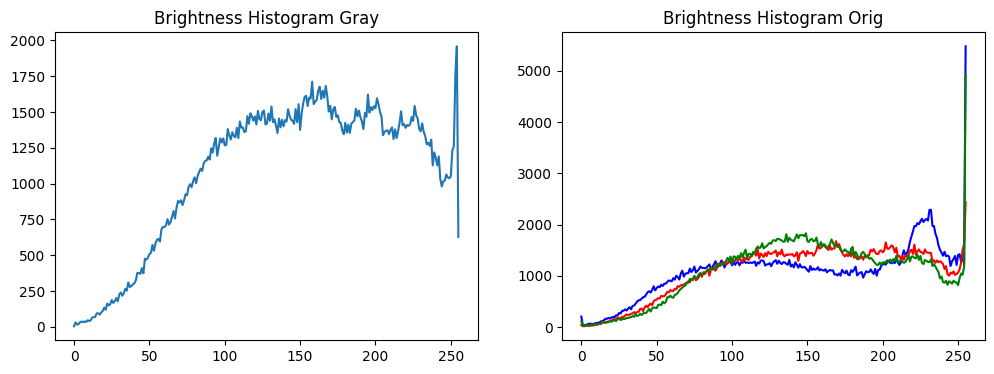

In [4]:
hist_orig_b = cv.calcHist([img], [0], None, [256], [0, 256])
hist_orig_r = cv.calcHist([img], [1], None, [256], [0, 256])
hist_orig_g = cv.calcHist([img], [2], None, [256], [0, 256])
hist_gray = cv.calcHist([gray_img], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_gray)
plt.title("Brightness Histogram Gray")
plt.subplot(1, 2, 2)
plt.plot(hist_orig_b,color = 'b')
plt.plot(hist_orig_r,color = 'r')
plt.plot(hist_orig_g,color = 'g')
plt.title("Brightness Histogram Orig")
plt.show()

**Review**
* Both graphs are left skewed, meaning that the image is mostly bright
* The histograms for BRG representations are similar, indicating that neutral colors are more prominent
* There is a small bump of blue to the right of the graph that can be attributed to the light blue skyline with few darker spots

3. **Image Filtering:**  
   * Apply the following filters to the grayscale image:  
       * Gaussian smoothing with different σ (sigma) values.  
       * Median filter with different kernel sizes.  
       * Laplacian filter for sharpening.  
   * Display the filtering results and compare them visually.  

In [5]:
gaussian_1 = cv.GaussianBlur(gray_img, (5, 5), 0.5)
gaussian_2 = cv.GaussianBlur(gray_img, (5, 5), 1)
gaussian_3 = cv.GaussianBlur(gray_img, (5, 5), 10)

cv.imshow('weak gaussian blur', gaussian_1)
cv.imshow('gaussian blur', gaussian_2)
cv.imshow('strong gaussian blur', gaussian_3)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
median_1 = cv.medianBlur(gray_img, 3)
median_2 = cv.medianBlur(gray_img, 5)
median_3 = cv.medianBlur(gray_img, 11)

cv.imshow('weak median blur', median_1)
cv.imshow('median blur', median_2)
cv.imshow('strong median blur', median_3)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
laplacian_gaussian = cv.Laplacian(gaussian_3, cv.CV_64F)
laplacian_median = cv.Laplacian(median_3, cv.CV_64F)
cv.imshow('laplacian_gaussian edges', laplacian_gaussian)
cv.imshow('laplacian_median edges', laplacian_median)
cv.waitKey(0)
cv.destroyAllWindows()

**Review**
* While both ways of blurring are valid, median blur, due to its nature, erases more details than gaussian blur. This can bee seen with laplasian filter that aims to detect strong contrasts of color or edges 

4. **Edge and Corner Detection:**  
   * Use the Sobel operator to compute horizontal and vertical gradients.  
   * Apply the Canny edge detection algorithm.  
   * Use the Harris or Shi-Tomasi corner detector to identify corner points.  
   * Overlay the results on the original image and display them. 

In [8]:
sobel_x = cv.Sobel(gray_img, cv.CV_64F, 1, 0)#Horizontal
sobel_y = cv.Sobel(gray_img, cv.CV_64F, 0, 1)#Vertical
cv.imshow('sobel_x', sobel_x)
cv.imshow('sobel_y', sobel_y)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
edgesCanny = cv.Canny(gray_img, 150, 200)
cv.imshow('edgesCanny', edgesCanny)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
image_harris = np.float32(gray_img)

harris_corners = cv.cornerHarris(image_harris, blockSize=2, ksize=5, k=0.02)
cv.imshow('harris_corners', harris_corners)
cv.waitKey(0)
cv.destroyAllWindows()

5. **Morphological Operations:**  
   * Binarize the grayscale image using threshold segmentation.  
   * Apply erosion and dilation operations with different structuring elements.  
   * Display the results and explain the effect of each operation.  

In [11]:
thresh, binary_image = cv.threshold(gray_img, 145, 255, cv.THRESH_BINARY)
cv.imshow('binary_image', binary_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
kernel_square = np.ones((3, 3), np.uint8)
kernel_circle = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

eroded_image_square = cv.erode(binary_image, kernel_square)
dilated_image_square = cv.dilate(binary_image, kernel_square)

eroded_image_circle = cv.erode(binary_image, kernel_circle)
dilated_image_circle = cv.dilate(binary_image, kernel_circle)

cv.imshow('eroded_image_square', eroded_image_square)
cv.imshow('dilated_image_square', dilated_image_square)
cv.imshow('eroded_image_circle', eroded_image_circle)
cv.imshow('dilated_image_circle', dilated_image_circle)

cv.waitKey(0)
cv.destroyAllWindows()

**Review**
* The circle kernel preserves more of the original image because its is fundamentally smaller and somewhat relies oh Manhattan distance, so the elements affecting are in a radius and there are no distant outliers that can be found in a square